# Border Extraction Tests 2

## Gather Test Images

In [5]:
%matplotlib inline

import os
from PIL import Image
from numpy import *
from pylab import *
fig = plt.figure(figsize=(10, 10), dpi=288)

all_images = {}
image_roots = [
    {
        "name": "DermQuest",
        "path": "DermQuest/"
    },
    {
        "name": "Dermofit",
        "path": "Dermofit/",
         "include_endswith": ".png",
         "exclude_contains": "mask"
    },
    {
        "name": "PH2Dataset",
        "path": "PH2Dataset/PH2 Dataset images",
        "include_endswith": ".bmp",
        "exclude_contains": "_"},
]


class ImageItem():
    def __init__(self, source, path):
        self.source = source
        self.path = path

    def get_image_data(self):
        if self.source == "DermQuest":
            # strip bottom copyright tag
            return array(Image.open(self.path))
        return array(Image.open(self.path))

    def __str__(self):
        return self.path


        # gather all images in all_image_root and store them in all_images
def gather_images():
    images = {}
    for root in image_roots:

        root_list = []

        if "include_endswith" in root and "exclude_contains" in root:
            for dirpath, dirnames, filenames in os.walk(root["path"]):
                for filename in [f for f in filenames if (f.endswith(root["include_endswith"]) and root["exclude_contains"] not in f)]:
                    root_list.append(
                        ImageItem(
                            path = os.path.join(dirpath, filename),
                            source = root['name']
                        )
                    )
        else:
            for dirpath, dirnames, filenames in os.walk(root["path"]):
                for filename in [f for f in filenames]:
                    root_list.append(
                        ImageItem(
                            path = os.path.join(dirpath, filename),
                            source = root['name']
                        )
                    )
        images[root["name"]] = root_list
    return images

all_images = gather_images()

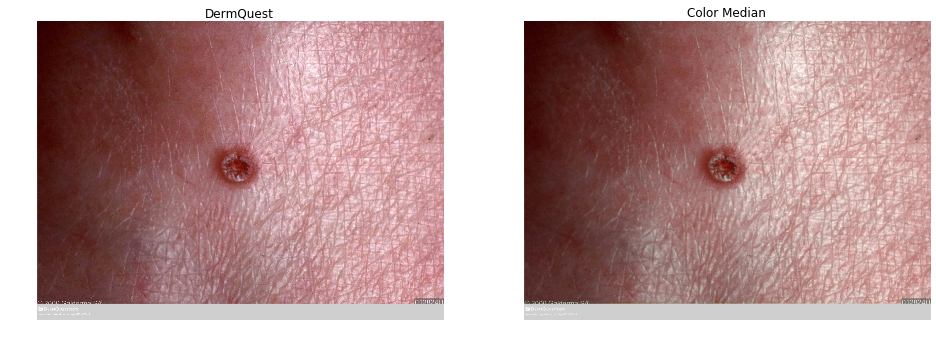

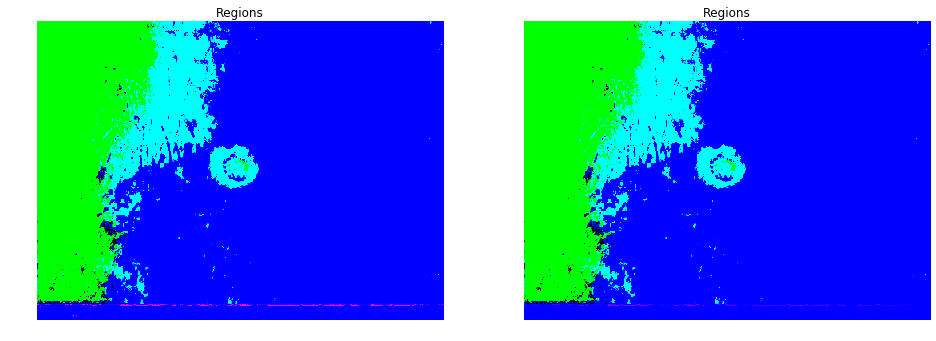

In [6]:
from scipy.ndimage import median_filter, label
from skimage.filters import threshold_otsu
from skimage.color import rgb2hsv

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True,
                             subplot_kw={'adjustable': 'box-forced'})

im = all_images["DermQuest"][4].get_image_data()
plt.subplot(121)
title('DermQuest')
axis('off')
imshow(im)

im_med = median_filter(im, 3)
plt.subplot(122)
title('Color Median')
axis('off')
imshow(im_med)
show()


fig, axes = plt.subplots(1, 3, figsize=(16, 6), sharex=True, sharey=True,
                             subplot_kw={'adjustable': 'box-forced'})

im_hsv = rgb2hsv(im_med)
otsu_1 = threshold_otsu(im_hsv[:,:,1])
mask = im_hsv > otsu_1
plt.subplot(121)
title('Regions')
axis('off')
imshow(mask)


regions, num_regions = label(mask)
plt.subplot(122)
title('Regions')
axis('off')
imshow(regions)


show()

# Segmentaion Test

/Users/alexandergustafson/anaconda/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


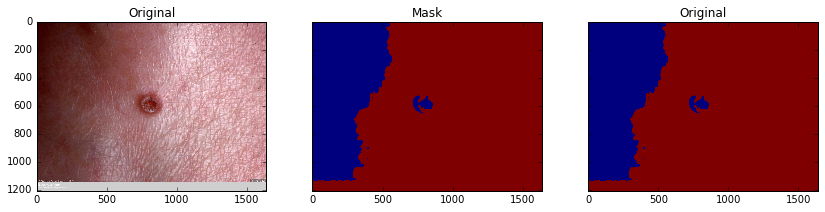

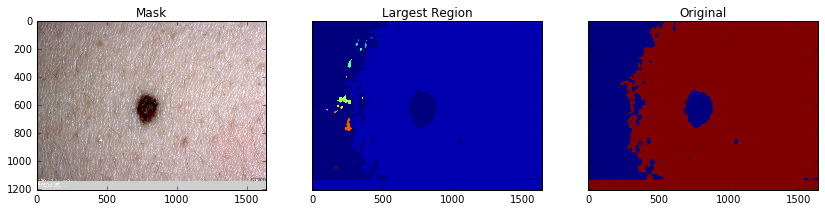

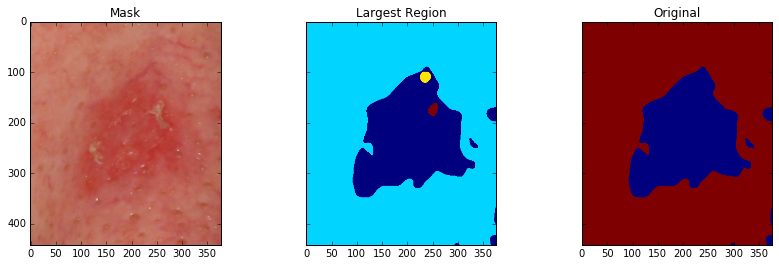

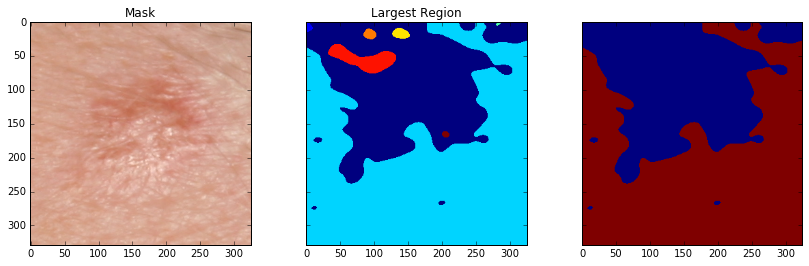

In [8]:
from skimage.color import rgb2gray
from skimage.filters import median
from skimage.filters import gaussian
from skimage.morphology import disk
from scipy.ndimage import measurements


def create_mask(image, threshold=0.22):

    grey_img = rgb2gray(image)
    grey_img = median(grey_img, disk(10))
    grey_img = gaussian(grey_img, 5)

    size_index = 0
    increment = 0.03
    fudge = 0.0
    while size_index < threshold: # progressively increase the size of the mask until the threshold is met
        mask = grey_img > (fudge)
        (m,n) = mask.shape
        mask_size = bincount(mask.ravel())

        size_index = mask_size[0]/(m*n)
        fudge = fudge + increment
        
    labeled_areas, _ = measurements.label(mask)
    sizes = bincount(labeled_areas.ravel()) # array of pixel count in each region
    sizes[0] = 0 # first element is total of all regions, so zero that
    max = sizes.argmax() # get the index of the max element
    largest_region = labeled_areas == max # filter all regions except the largest
    
    return labeled_areas, largest_region

fig, axes = plt.subplots(1, 3, figsize=(14, 4), sharex=True, sharey=True,
                             subplot_kw={'adjustable': 'box-forced'})

im = all_images["DermQuest"][4].get_image_data()
labeled_areas, largest_region = create_mask(im)

ax = axes[0]
ax.set_title("Original")
axes = axes[1:]
ax.imshow(im)

ax = axes[0]
ax.set_title("Mask")
axes = axes[1:]
ax.imshow(labeled_areas)

ax = axes[0]
ax.set_title("Largest Region")
axes = axes[1:]
ax.imshow(largest_region)

fig, axes = plt.subplots(1, 3, figsize=(14, 4), sharex=True, sharey=True,
                             subplot_kw={'adjustable': 'box-forced'})



im = all_images["DermQuest"][6].get_image_data()
labeled_areas, largest_region = create_mask(im)

ax = axes[0]
ax.set_title("Original")
axes = axes[1:]
ax.imshow(im)

ax = axes[0]
ax.set_title("Mask")
axes = axes[1:]
ax.imshow(labeled_areas)

ax = axes[0]
ax.set_title("Largest Region")
axes = axes[1:]
ax.imshow(largest_region)

fig, axes = plt.subplots(1, 3, figsize=(14, 4), sharex=True, sharey=True,
                             subplot_kw={'adjustable': 'box-forced'})

im = all_images["Dermofit"][2].get_image_data()
labeled_areas, largest_region = create_mask(im)

ax = axes[0]
ax.set_title("Original")
axes = axes[1:]
ax.imshow(im)

ax = axes[0]
ax.set_title("Mask")
axes = axes[1:]
ax.imshow(labeled_areas)

ax = axes[0]
ax.set_title("Largest Region")
axes = axes[1:]
ax.imshow(largest_region)


fig, axes = plt.subplots(1, 3, figsize=(14, 4), sharex=True, sharey=True,
                             subplot_kw={'adjustable': 'box-forced'})

im = all_images["Dermofit"][222].get_image_data()
labeled_areas, largest_region = create_mask(im)

ax = axes[0]
ax.set_title("Original")
axes = axes[1:]
ax.imshow(im)

ax = axes[0]
ax.set_title("Mask")
axes = axes[1:]
ax.imshow(labeled_areas)

ax = axes[0]
ax.set_title("Largest Region")
axes = axes[1:]
ax.imshow(largest_region)

Dermofit and DermQuest images are not getting optimally masked. Illumination differences in an image are being picked up as disctinct regions. Some sort of high-pass filter might be usefull. Also, darker areas, including the mole are being processed as background area. Inverting the maks would fix that, but might not be robust in all cases.

## Growing Regions, Scaled from Center

We can assume that the mole should be located in or near the center of the image. Try small areas at the center first, scale until no edge of maks is touching the border of the image.

/Users/alexandergustafson/anaconda/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


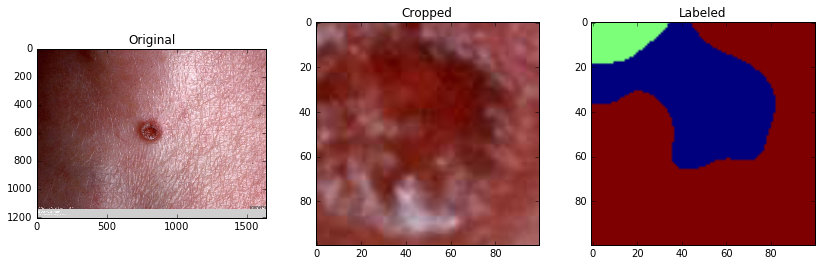

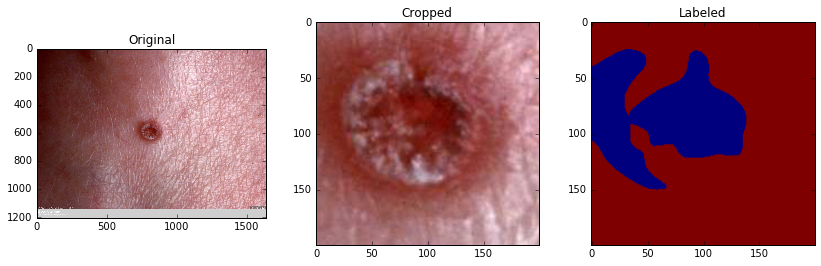

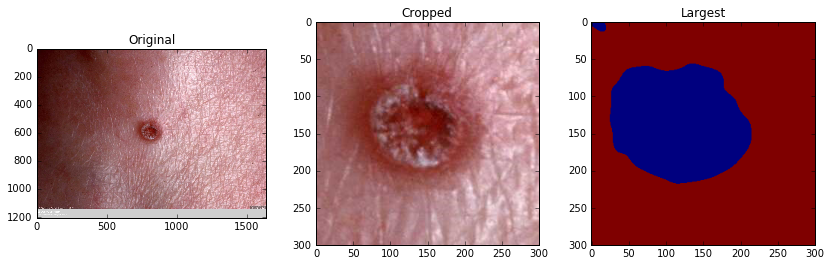

In [9]:
im = all_images["DermQuest"][4].get_image_data()

oy, ox, oc = im.shape
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

ax = axes[0]
axes = axes[1:]
ax.set_title("Original")
ax.imshow(im)

mask_size = 50

masked = im[int(oy/2) - mask_size:int(oy/2) + mask_size,int(ox/2) - mask_size:int(ox/2) + mask_size ]

ax = axes[0]
axes = axes[1:]
ax.set_title("Cropped")
ax.imshow(masked)

labeled_areas, largest_region = create_mask(masked)

ax = axes[0]
axes = axes[1:]
ax.set_title("Labeled")
ax.imshow(labeled_areas)

# increase image size and try again:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

ax = axes[0]
axes = axes[1:]
ax.set_title("Original")
ax.imshow(im)

mask_size = 100

masked = im[int(oy/2) - mask_size:int(oy/2) + mask_size,int(ox/2) - mask_size:int(ox/2) + mask_size ]

ax = axes[0]
axes = axes[1:]
ax.set_title("Cropped")
ax.imshow(masked)

labeled_areas, largest_region = create_mask(masked)

ax = axes[0]
axes = axes[1:]
ax.set_title("Labeled")
ax.imshow(labeled_areas)

# increase image size and try again:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

ax = axes[0]
axes = axes[1:]
ax.set_title("Original")
ax.imshow(im)

mask_size = 150

masked = im[int(oy/2) - mask_size:int(oy/2) + mask_size,int(ox/2) - mask_size:int(ox/2) + mask_size ]

ax = axes[0]
axes = axes[1:]
ax.set_title("Cropped")
ax.imshow(masked)

labeled_areas, largest_region = create_mask(masked)

ax = axes[0]
axes = axes[1:]
ax.set_title("Largest")
ax.imshow(largest_region)


Has potential, needs more thought and more examples


# Illumination Correction Test with OpenCV

/Users/alexandergustafson/anaconda/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/alexandergustafson/anaconda/lib/python3.5/site-packages/skimage/util/dtype.py:106: UserWarning: Possible sign loss when converting negative image of type int64 to positive image of type uint8.
  "%s to positive image of type %s." % (dtypeobj_in, dtypeobj))
/Users/alexandergustafson/anaconda/lib/python3.5/site-packages/skimage/util/dtype.py:136: UserWarning: Downcasting int64 to uint8 without scaling because max value 1 fits in uint8
  warn(msg)


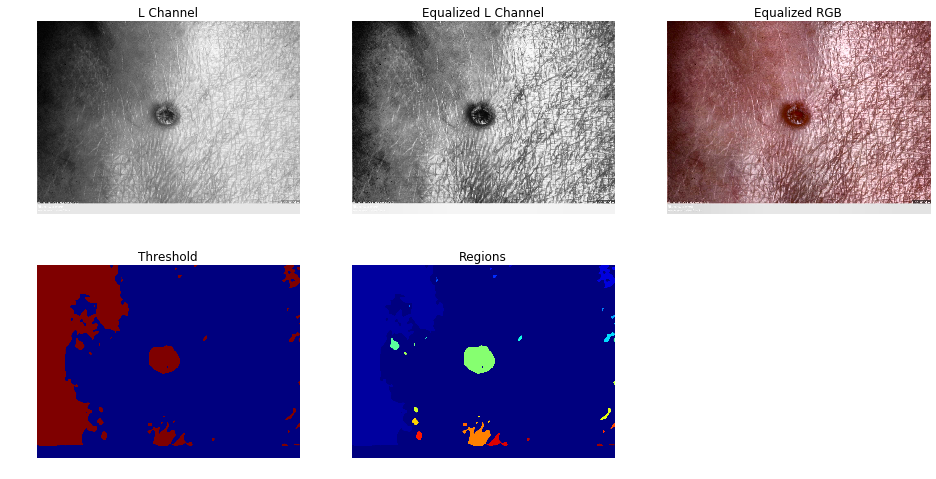

In [12]:

import cv2 # on osx i needed to update h5py with the anaconda navigator
from skimage import img_as_ubyte # converts skimage info to cv image
import matplotlib.patches as patches

# This is adapted from the following url:
# http://stackoverflow.com/questions/24341114/simple-illumination-correction-in-images-opencv-c

# convert image to Lab color-space
# apply adaptive histogram equalization to the L channel ( brightness channel )
# convert result back to RGB

fig = plt.figure(figsize=(16, 8), dpi=288)

im = all_images["DermQuest"][4].get_image_data()
im_lab = cv2.cvtColor(im, cv2.COLOR_BGR2LAB)
dim = im.shape

plt.subplot(231)
title('L Channel')
axis('off')
imshow(im_lab[:, :, 0], cmap='Greys_r')

plt.subplot(232)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4, 4))
cl1 = clahe.apply(im_lab[:, :, 0])
title('Equalized L Channel')
axis('off')
imshow(cl1, cmap='Greys_r')

merged = np.copy(im_lab)
merged[:, :, 0] = cl1

im_rgb = cv2.cvtColor(merged, cv2.COLOR_LAB2BGR)
plt.subplot(233)

title('Equalized RGB')
axis('off')
imshow(im_rgb)


def adaptive_mask(image, threshold=0.22):
    grey_img = rgb2gray(image)
    grey_img = median(grey_img, disk(8))
    grey_img = gaussian(grey_img, 8)

    size_index = 0
    increment = 0.03
    fudge = 0.0
    while size_index < threshold:  # progressively increase the size of the mask until the threshold is met
        mask = grey_img > (fudge)
        (m, n) = mask.shape
        mask_size = bincount(mask.ravel())

        size_index = mask_size[0] / (m * n)
        fudge = fudge + increment

    return 1 - mask # TODO: this is bad!, depending on content will vary, find more robust method


mask = adaptive_mask(im_rgb)


plt.subplot(234)
axis('off')
title('Threshold')
imshow(mask)

output = cv2.connectedComponentsWithStats(img_as_ubyte(mask), 4, cv2.CV_32S)  

num_labels = output[0]
labels = output[1]
stats = output[2]

ax4 = plt.subplot(235)
axis('off')
title('Regions')
imshow(output[1])

show()

# cv2.imwrite('test.png', img_as_ubyte(mask))

Package the two methods above ( scaling from center and illumination normalization ) into a function and test on more images from all sources:

# Scaled From Center + Illumination Normalization


In [149]:
def crop_to_center(image, scale=1.0):
    if scale == 1.0:
        return image
    else:
        height = int(image.shape[0] * scale)
        width = int(image.shape[1] * scale)
        top = int(image.shape[0]/2) - int(height/2)
        left = int(image.shape[1]/2) - int(width/2)
        
    return image[top:top+height,left:left+width]
    
def create_regions(image_original, region_scale=1.0, threshold=0.23):
                  
    image = crop_to_center(image_original, region_scale)
    shape = image.shape
    
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4, 4)) # Contrast Limited Adaptive Histogram Equalization
    v_eq = clahe.apply(image_hsv[:, :, 2]) # Apply Equalization to Value Channel of LAB image
    s_eq = clahe.apply(image_hsv[:, :, 1])
    
    image_hsv[:,:,2] = v_eq
    image_hsv[:,:,1] = s_eq
    
    # merged = v_eq * s_eq
    
    im = cv2.medianBlur(v_eq, 9)
    im = cv2.GaussianBlur(im,(21,21), 0)
    
    size_index = 0
    increment = 5
    fudge = 0.0
    
    while size_index < threshold:
        ret ,mask = cv2.threshold(im,fudge,255,cv2.THRESH_BINARY)
        mask_size = bincount(mask.ravel())
        size_index = mask_size[0] / (shape[0] * shape[1])
        fudge = fudge + increment
    
    
    mask = 255 - mask
    distances_from_boundary = (100, 100, 100, 100)
    scale = 1.0
    
    while min(distances_from_boundary) > 40:
        
        region, cropped, distances_from_boundary = select_region_closest_to_center(mask, image, scale)
        scale -= 0.1
    
    ret ,mask = cv2.threshold(region,1,255,cv2.THRESH_BINARY)  

    return mask, cropped, cv2.bitwise_and(cropped,cropped,mask= mask)

def select_region_closest_to_center(mask,original, scale=1.0):
    
    mask = crop_to_center(mask, scale)
    original = crop_to_center(original, scale)
    
    output = cv2.connectedComponentsWithStats(img_as_ubyte(mask), 4, cv2.CV_32S)  

    num_regions = output[0]
    regions = output[1]
    stats = output[2]

    # find region closest to center
    center = (int(mask.shape[0]/2),int(mask.shape[1]/2))
    region_index = 0
    center_id = regions[center]
    region = regions == center_id
    kernel = np.ones((15,15),np.uint8)
    #region = cv2.morphologyEx(img_as_ubyte(region), cv2.MORPH_CLOSE, kernel)
    #region = cv2.morphologyEx(region, cv2.MORPH_CLOSE, kernel)
    region = cv2.dilate(img_as_ubyte(region),kernel,iterations = 2)
    
    output = cv2.connectedComponentsWithStats(img_as_ubyte(region), 4, cv2.CV_32S)  
    
    distances_from_boundary = (
        output[2][1][0],
        output[2][1][1],
        output[2][0][2] - (output[2][1][0] + output[2][1][2]),
        output[2][0][3] - (output[2][1][1] + output[2][1][3]),
    )
    return region, original, distances_from_boundary

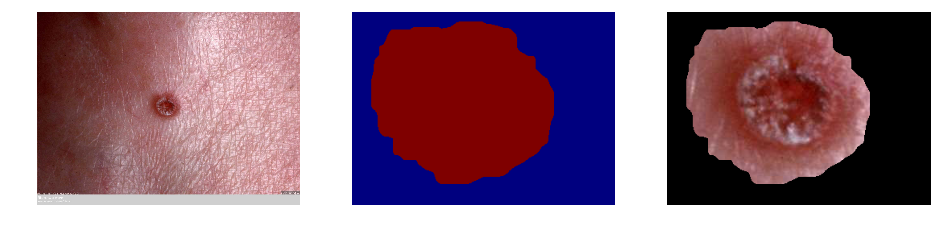

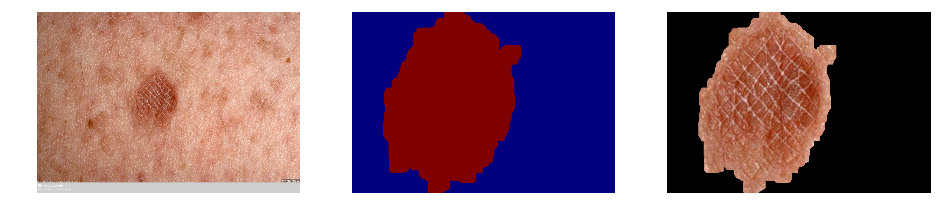

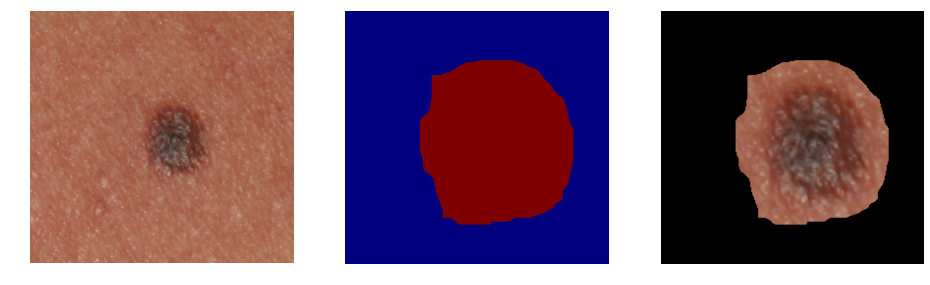

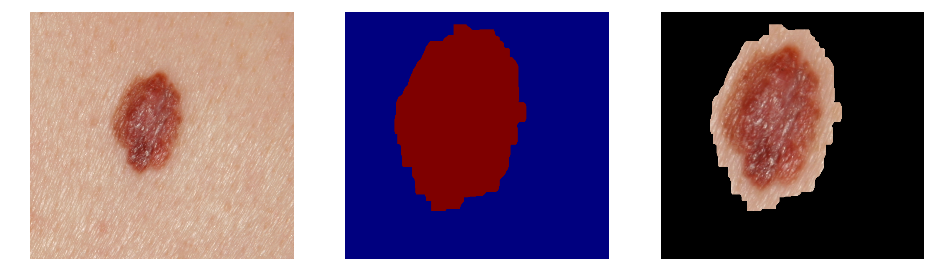

In [152]:
masked_images = []

fig = plt.figure(figsize=(16, 8), dpi=288)
im = all_images["DermQuest"][4].get_image_data()

mask, cropped, masked = create_regions(im)
masked_images.append(masked)

plt.subplot(131)
axis('off')
imshow(im)

plt.subplot(132)
axis('off')
imshow(mask)

plt.subplot(133)
axis('off')
imshow(masked)

show()

fig = plt.figure(figsize=(16, 8), dpi=288)
im = all_images["DermQuest"][3].get_image_data()

mask, cropped, masked = create_regions(im)
masked_images.append(masked)

plt.subplot(131)
axis('off')
imshow(im)

plt.subplot(132)
axis('off')
imshow(mask)

plt.subplot(133)
axis('off')
imshow(masked)

show()

fig = plt.figure(figsize=(16, 8), dpi=288)
im = all_images["Dermofit"][533].get_image_data()

mask, cropped, masked = create_regions(im)
masked_images.append(masked)

plt.subplot(131)
axis('off')
imshow(im)

plt.subplot(132)
axis('off')
imshow(mask)

plt.subplot(133)
axis('off')
imshow(masked)

show()

fig = plt.figure(figsize=(16, 8), dpi=288)
im = all_images["Dermofit"][537].get_image_data()

mask, cropped, masked = create_regions(im)
masked_images.append(masked)

plt.subplot(131)
axis('off')
imshow(im)

plt.subplot(132)
axis('off')
imshow(mask)

plt.subplot(133)
axis('off')
imshow(masked)

show()

# Mole Border